In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the movie data
data = pd.read_excel('MovieData.xlsx')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#shape of the dataset
data.shape

(24999, 2)

In [4]:
#description of dataset
data.describe()

,review,sentiment
count,24999,24999
unique,24896,2
top,Loved today's show!!! It was a variety and not...,negative
freq,4,12525


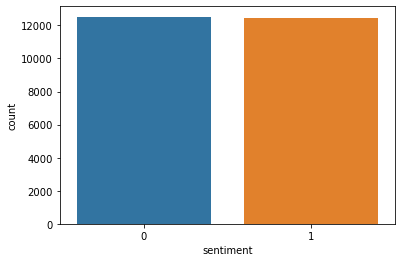

In [157]:
#sentiment counts in graphical form
sns.countplot(x='sentiment',data=data)

In [6]:
data.replace({'positive':1,'negative':0},inplace=True)

In [7]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
import nltk

In [9]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [10]:
from nltk.stem.porter import PorterStemmer

In [11]:
from nltk.corpus import stopwords

In [12]:
import re
ps = PorterStemmer()

In [13]:
#data preprocessing of the data set
corpus = []
for i in range(len(data)):
    review = re.sub('az-A-Z','',data['review'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ''.join(review)
    corpus.append(review)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [139]:
#conversion from text to numeric
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [140]:
X.shape

(24999, 5000)

In [141]:
y = data['sentiment']

In [142]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
#spliting into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [145]:
#importing Gaussian and Multinomial NB
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [146]:
#fitting the Multinomial NB model
model = MultinomialNB().fit(X_train,y_train)

In [147]:
# making prediction using Multinomial NB
predict = model.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [169]:
#accuracy of the Multinomial NB model
print('Accuracy of Multinomial is ',accuracy_score(y_test,predict))
print('\n')
print('Confusion Matrix for Multinomial:')
print(classification_report(y_test,predict))

Accuracy of Multinomial is  0.7003636363636364


Confusion Matrix for Multinomial:
              precision    recall  f1-score   support

           0       0.69      0.72      0.71      4136
           1       0.71      0.68      0.69      4114

    accuracy                           0.70      8250
   macro avg       0.70      0.70      0.70      8250
weighted avg       0.70      0.70      0.70      8250



In [161]:
#fitting Gaussian NB model
Gauss = GaussianNB().fit(X_train,y_train)

In [162]:
#making prediction for GaussainNB
Gauss_predict = Gauss.predict(X_test)

In [170]:
#accuracy of Gaussian Model
print('Accuracy of GaussianNB is ',accuracy_score(y_test,Gauss_predict))
print('\n')
print('Confusion Matrix for GaussianNB:')
print(classification_report(y_test,Gauss_predict))

Accuracy of GaussianNB is  0.6716363636363636


Confusion Matrix for GaussianNB:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      4136
           1       0.65      0.73      0.69      4114

    accuracy                           0.67      8250
   macro avg       0.67      0.67      0.67      8250
weighted avg       0.67      0.67      0.67      8250



In [153]:
#importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [154]:
#fitting Logistic Regression
LR = LogisticRegression().fit(X_train,y_train)

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [155]:
#making prediction 
LR_predict = LR.predict(X_test)

In [171]:
print('Accuracy of Logistic Model is',accuracy_score(y_test,LR_predict))
print('\n')
print('Confusion Matrix for Logistic Model:')
print(classification_report(y_test,LR_predict))

Accuracy of Logistic Model is 0.7002424242424242


Confusion Matrix for Logistic Model:
              precision    recall  f1-score   support

           0       0.72      0.65      0.69      4136
           1       0.68      0.75      0.71      4114

    accuracy                           0.70      8250
   macro avg       0.70      0.70      0.70      8250
weighted avg       0.70      0.70      0.70      8250

